In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
def load_file(json_file):
    with open(json_file) as f:
        data = json.load(f)
        f.close()
    return data #returns list of dicts

data = load_file('sb_public_events_data_15946.json')
data[1]['team']['name']

'Deportivo Alavés'

In [3]:
data[0]['tactics']['lineup'][0]['player']['name']

'Marc-André ter Stegen'

In [4]:
data[1000]

{'id': '834c876c-c672-4e10-ac4f-1852dbeb70f9',
 'index': 1001,
 'period': 1,
 'timestamp': '00:21:42.652',
 'minute': 21,
 'second': 42,
 'type': {'id': 43, 'name': 'Carry'},
 'possession': 38,
 'possession_team': {'id': 217, 'name': 'Barcelona'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 217, 'name': 'Barcelona'},
 'player': {'id': 5211, 'name': 'Jordi Alba Ramos'},
 'position': {'id': 6, 'name': 'Left Back'},
 'location': [82.0, 7.0],
 'duration': 0.985,
 'related_events': ['3a757a5d-a871-44c3-8730-3b88d16a4390',
  '58a38235-1219-4aa0-90f8-65bec1c0608b'],
 'carry': {'end_location': [82.0, 7.0]}}

In [5]:
def to_dataframe(data):
    idx = 0
    
    index = []
    period = []
    duration = []
    t = []
    player = []
    minute = []
    second = []
    x_coord = []
    y_coord = []
    end_x_coord = []
    end_y_coord = []
    play_pattern = []
    recipient = []
    outcome = []
    team = []
    poss_team = []
    height = []
    
    for idx in range(0,len(data)):
        if ("index" in data[idx]):
            index.append(data[idx]['index'])
        else:
            index.append(0)
        if ("period" in data[idx]):
            period.append(data[idx]['period'])
        else:
            period.append(None)

        if ("duration" in data[idx]):
            duration.append(data[idx]['duration'])
        else:
            duration.append(0)

        if ("type" in data[idx]):
            t.append(data[idx]['type']['name'])
        else:
            t.append(None)

        if ("player" in data[idx]):
            player.append(data[idx]['player']['name'])
        else:
            player.append(None)

        if ("minute" in data[idx]):
            minute.append(data[idx]['minute'])
        else:
            minute.append(None)

        if ("second" in data[idx]):
            second.append(data[idx]['second'])
        else:
            second.append(None)

        if ("location" in data[idx]):
            x_coord.append(data[idx]['location'][0])
            y_coord.append(data[idx]['location'][1])
        else:
            x_coord.append(None)
            y_coord.append(None)

        if ("pass" in data[idx]):
            if("end_location" in data[idx]['pass']):
                end_x_coord.append(data[idx]['pass']['end_location'][0])
                end_y_coord.append(data[idx]['pass']['end_location'][1])
            else:
                end_x_coord.append(None)
                end_y_coord.append(None)
        elif("shot" in data[idx]):
            if("end_location" in data[idx]['shot']):
                end_x_coord.append(data[idx]['shot']['end_location'][0])
                end_y_coord.append(data[idx]['shot']['end_location'][1])
            else:
                end_x_coord.append(None)
                end_y_coord.append(None)
        else:
            end_x_coord.append(None)
            end_y_coord.append(None)
        
        if ("play_pattern" in data[idx]):
            play_pattern.append(data[idx]['play_pattern']['name'])
        else:
            play_pattern.append(None)

        if ("pass" in data[idx]):
            if ("recipient" in data[idx]['pass']):
                recipient.append(data[idx]['pass']['recipient']['name'])
            else:
                recipient.append(None)  
        else:
            recipient.append(None)

        if ("pass" in data[idx]):
            if("outcome" in data[idx]['pass']):
                outcome.append(data[idx]['pass']['outcome']['name'])
            elif("outcome" not in data[idx]['pass']):
                outcome.append("Complete")
        else:
            outcome.append(None)

        if ("team" in data[idx]):
            team.append(data[idx]['team']['name'])
        else:
            team.append(None)

        if ("possession_team" in data[idx]):
            poss_team.append(data[idx]['possession_team']['name'])
        else:
            poss_team.append(None)
        
        if ("pass" in data[idx]):
            if('height' in data[idx]['pass']):
                height.append(data[idx]['pass']['height']['name'])
            else:
                height.append(None)
        else:
            height.append(None)

    df = pd.DataFrame()
    df['index'] = index
    df['period'] = period
    df['duration'] = duration
    df['minute'] = minute
    df['second'] = second
    df['type'] = t
    df['player'] = player
    df['team'] = team
    df['poss_team'] = poss_team
    df['x_coord'] = x_coord
    df['y_coord'] = y_coord
    df['end_x_coord'] = end_x_coord 
    df['end_y_coord'] = end_y_coord
    df['play_pattern'] = play_pattern
    df['recipient'] = recipient
    df['height'] = height
    df['outcome'] = outcome

    return df

In [6]:
df = to_dataframe(data)
df.head(25)

,index,period,duration,minute,second,type,player,team,poss_team,x_coord,y_coord,end_x_coord,end_y_coord,play_pattern,recipient,height,outcome
0,1,1,0.000,0,0,Starting XI,None,Barcelona,Barcelona,NaN,NaN,NaN,NaN,Regular Play,None,None,None
1,2,1,0.000,0,0,Starting XI,None,Deportivo Alavés,Barcelona,NaN,NaN,NaN,NaN,Regular Play,None,None,None
2,3,1,0.000,0,0,Half Start,None,Deportivo Alavés,Barcelona,NaN,NaN,NaN,NaN,Regular Play,None,None,None
3,4,1,0.000,0,0,Half Start,None,Barcelona,Barcelona,NaN,NaN,NaN,NaN,Regular Play,None,None,None
4,5,1,1.909,0,0,Pass,Jonathan Rodríguez Menéndez,Deportivo Alavés,Deportivo Alavés,61.0,41.0,36.0,26.0,From Kick Off,Guillermo Alfonso Maripán Loaysa,Ground Pass,Complete
5,6,1,0.000,0,2,Ball Receipt*,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés,Deportivo Alavés,36.0,26.0,NaN,NaN,From Kick Off,None,None,None
6,7,1,1.490,0,2,Carry,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés,Deportivo Alavés,36.0,26.0,NaN,NaN,From Kick Off,None,None,None
7,8,1,3.288,0,3,Pass,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés,Deportivo Alavés,36.0,29.0,86.0,73.0,From Kick Off,Rubén Sobrino Pozuelo,High Pass,Incomplete
8,9,1,0.000,0,6,Ball Receipt*,Rubén Sobrino Pozuelo,Deportivo Alavés,Deportivo Alavés,85.0,73.0,NaN,NaN,From Kick Off,None,None,None
9,10,1,1.646,0,6,Pass,Sergio Busquets i Burgos,Barcelona,Barcelona,35.0,8.0,35.0,21.0,Regular Play,Ivan Rakitić,High Pass,Complete


In [7]:
def get_lineups(data):
    
    idx = 0
    
    home_team_formation = data[idx]['tactics']['formation']
    home_team = data[idx]['team']['name']
    home_names = []
    home_player_id = []
    home_positions = []
    home_shirt_numbers = []
    
    for i in range(0, 11):
        home_shirt_numbers.append(data[idx]['tactics']['lineup'][i]['jersey_number'])
        home_player_id.append(data[idx]['tactics']['lineup'][i]['player']['id'])
        home_names.append(data[idx]['tactics']['lineup'][i]['player']['name'])
        home_positions.append(data[idx]['tactics']['lineup'][i]['position']['name'])
    
    home_df = pd.DataFrame()
    home_df['player_id'] = home_player_id
    home_df['home_names'] = home_names
    home_df['shirt_number'] = home_shirt_numbers
    home_df['position'] = home_positions
    home_df['team'] = [home_team for n in range(11)]
    
    idx = 1
    
    away_team_formation = data[idx]['tactics']['formation']
    away_team = data[idx]['team']['name']
    away_names = []
    away_player_id = []
    away_positions = []
    away_shirt_numbers = []
    
    for i in range(0, 11):
        away_shirt_numbers.append(data[idx]['tactics']['lineup'][i]['jersey_number'])
        away_player_id.append(data[idx]['tactics']['lineup'][i]['player']['id'])
        away_names.append(data[idx]['tactics']['lineup'][i]['player']['name'])
        away_positions.append(data[idx]['tactics']['lineup'][i]['position']['name'])
    
    away_df = pd.DataFrame()
    away_df['player_id'] = away_player_id
    away_df['away_names'] = away_names
    away_df['shirt_number'] = away_shirt_numbers
    away_df['position'] = away_positions
    away_df['team'] = [away_team for n in range(11)]  
    
    return home_df, away_df, home_team_formation, away_team_formation

home_df, away_df, home_team_formation, away_team_formation = get_lineups(data)

In [8]:
home_df

,player_id,home_names,shirt_number,position,team
0,20055,Marc-André ter Stegen,1,Goalkeeper,Barcelona
1,6374,Nélson Cabral Semedo,2,Right Back,Barcelona
2,5213,Gerard Piqué Bernabéu,3,Right Center Back,Barcelona
3,5492,Samuel Yves Umtiti,23,Left Center Back,Barcelona
4,5211,Jordi Alba Ramos,18,Left Back,Barcelona
5,6379,Sergi Roberto Carnicer,20,Right Midfield,Barcelona
6,5203,Sergio Busquets i Burgos,5,Right Center Midfield,Barcelona
7,5470,Ivan Rakitić,4,Left Center Midfield,Barcelona
8,5477,Ousmane Dembélé,11,Left Midfield,Barcelona
9,5246,Luis Alberto Suárez Díaz,9,Right Center Forward,Barcelona


In [9]:
away_df

,player_id,home_names,shirt_number,position,team
0,6629,Fernando Pacheco Flores,1,Goalkeeper,Deportivo Alavés
1,6618,Martín Aguirregabiria Padilla,21,Right Back,Deportivo Alavés
2,6615,Víctor Laguardia Cisneros,5,Right Center Back,Deportivo Alavés
3,6855,Guillermo Alfonso Maripán Loaysa,6,Left Center Back,Deportivo Alavés
4,6612,Rubén Duarte Sánchez,3,Left Back,Deportivo Alavés
5,6839,Daniel Alejandro Torres Rojas,16,Center Defensive Midfield,Deportivo Alavés
6,6617,Ibai Gómez Pérez,11,Right Midfield,Deportivo Alavés
7,6626,Mubarak Wakaso,22,Right Center Midfield,Deportivo Alavés
8,6632,Manuel Alejandro García Sánchez,19,Left Center Midfield,Deportivo Alavés
9,6581,Jonathan Rodríguez Menéndez,23,Left Midfield,Deportivo Alavés


In [10]:
home_team_formation, away_team_formation

(442, 4141)

## Looking at passes

In [11]:
# All passes

df_pass = df[(df['type'] == 'Pass')
             &(df['play_pattern'] == 'Regular Play')]
df_pass

,index,period,duration,minute,second,type,player,team,poss_team,x_coord,y_coord,end_x_coord,end_y_coord,play_pattern,recipient,height,outcome
9,10,1,1.646,0,6,Pass,Sergio Busquets i Burgos,Barcelona,Barcelona,35.0,8.0,35.0,21.0,Regular Play,Ivan Rakitić,High Pass,Complete
11,12,1,1.145,0,8,Pass,Ivan Rakitić,Barcelona,Barcelona,36.0,21.0,36.0,2.0,Regular Play,Ousmane Dembélé,Low Pass,Complete
15,16,1,0.717,0,10,Pass,Ousmane Dembélé,Barcelona,Barcelona,34.0,3.0,26.0,2.0,Regular Play,Jordi Alba Ramos,Ground Pass,Complete
17,18,1,4.593,0,11,Pass,Jordi Alba Ramos,Barcelona,Barcelona,25.0,2.0,94.0,20.0,Regular Play,Luis Alberto Suárez Díaz,High Pass,Incomplete
21,22,1,4.139,0,24,Pass,Víctor Laguardia Cisneros,Deportivo Alavés,Barcelona,36.0,69.0,108.0,55.0,Regular Play,Rubén Sobrino Pozuelo,High Pass,Incomplete
25,26,1,1.758,0,30,Pass,Marc-André ter Stegen,Barcelona,Barcelona,14.0,28.0,23.0,44.0,Regular Play,Gerard Piqué Bernabéu,Ground Pass,Complete
28,29,1,1.173,0,34,Pass,Gerard Piqué Bernabéu,Barcelona,Barcelona,35.0,54.0,44.0,72.0,Regular Play,Nélson Cabral Semedo,Ground Pass,Complete
31,32,1,0.717,0,37,Pass,Nélson Cabral Semedo,Barcelona,Barcelona,50.0,72.0,57.0,63.0,Regular Play,Sergi Roberto Carnicer,Ground Pass,Complete
33,34,1,0.900,0,38,Pass,Sergi Roberto Carnicer,Barcelona,Barcelona,56.0,63.0,47.0,69.0,Regular Play,Nélson Cabral Semedo,Ground Pass,Complete
36,37,1,1.776,0,39,Pass,Nélson Cabral Semedo,Barcelona,Barcelona,48.0,69.0,39.0,34.0,Regular Play,Samuel Yves Umtiti,Ground Pass,Complete


In [12]:
# Barca Passes

df_barca_pass = df_pass[df_pass['team'] == 'Barcelona']
df_barca_pass.play_pattern.unique()

array(['Regular Play'], dtype=object)

(530,) (530,) (530,) (530,)


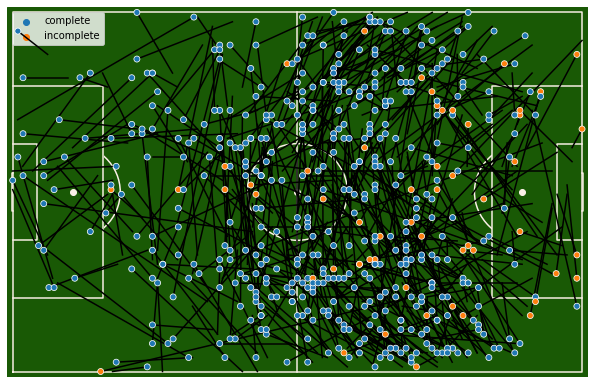

In [34]:
# Plot passes on pitch
from plottingpitches import plot_pitch
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

x_scaler = MinMaxScaler(feature_range = [0, 104])
y_scaler = MinMaxScaler(feature_range = [0, 68])

x = df_barca_pass.x_coord.values
y = df_barca_pass.y_coord.values
x2 = df_barca_pass.end_x_coord.values
y2 = df_barca_pass.end_y_coord.values
outcome = df_barca_pass.outcome.values
outcome = ['complete' if x == 'Complete' else 'incomplete' for x in outcome]

x = x_scaler.fit_transform(x.reshape(-1,1))
y = y_scaler.fit_transform(y.reshape(-1,1))
x2 = x_scaler.fit_transform(x2.reshape(-1,1))
y2 = y_scaler.fit_transform(y2.reshape(-1,1))
x = x.flatten()
y = y.flatten()
x2 = x2.flatten()
y2 = y2.flatten()

print(x.shape,y.shape, x2.shape, y2.shape)
plot_pitch(pitchcolour="#195905", linecolour="#faf0e6",
         orientation = "horizontal", view = "full")
sns.scatterplot(x, y, hue=outcome, zorder=12)
plt.plot([x,x2],[y,y2],zorder=11,alpha=1,color="black");